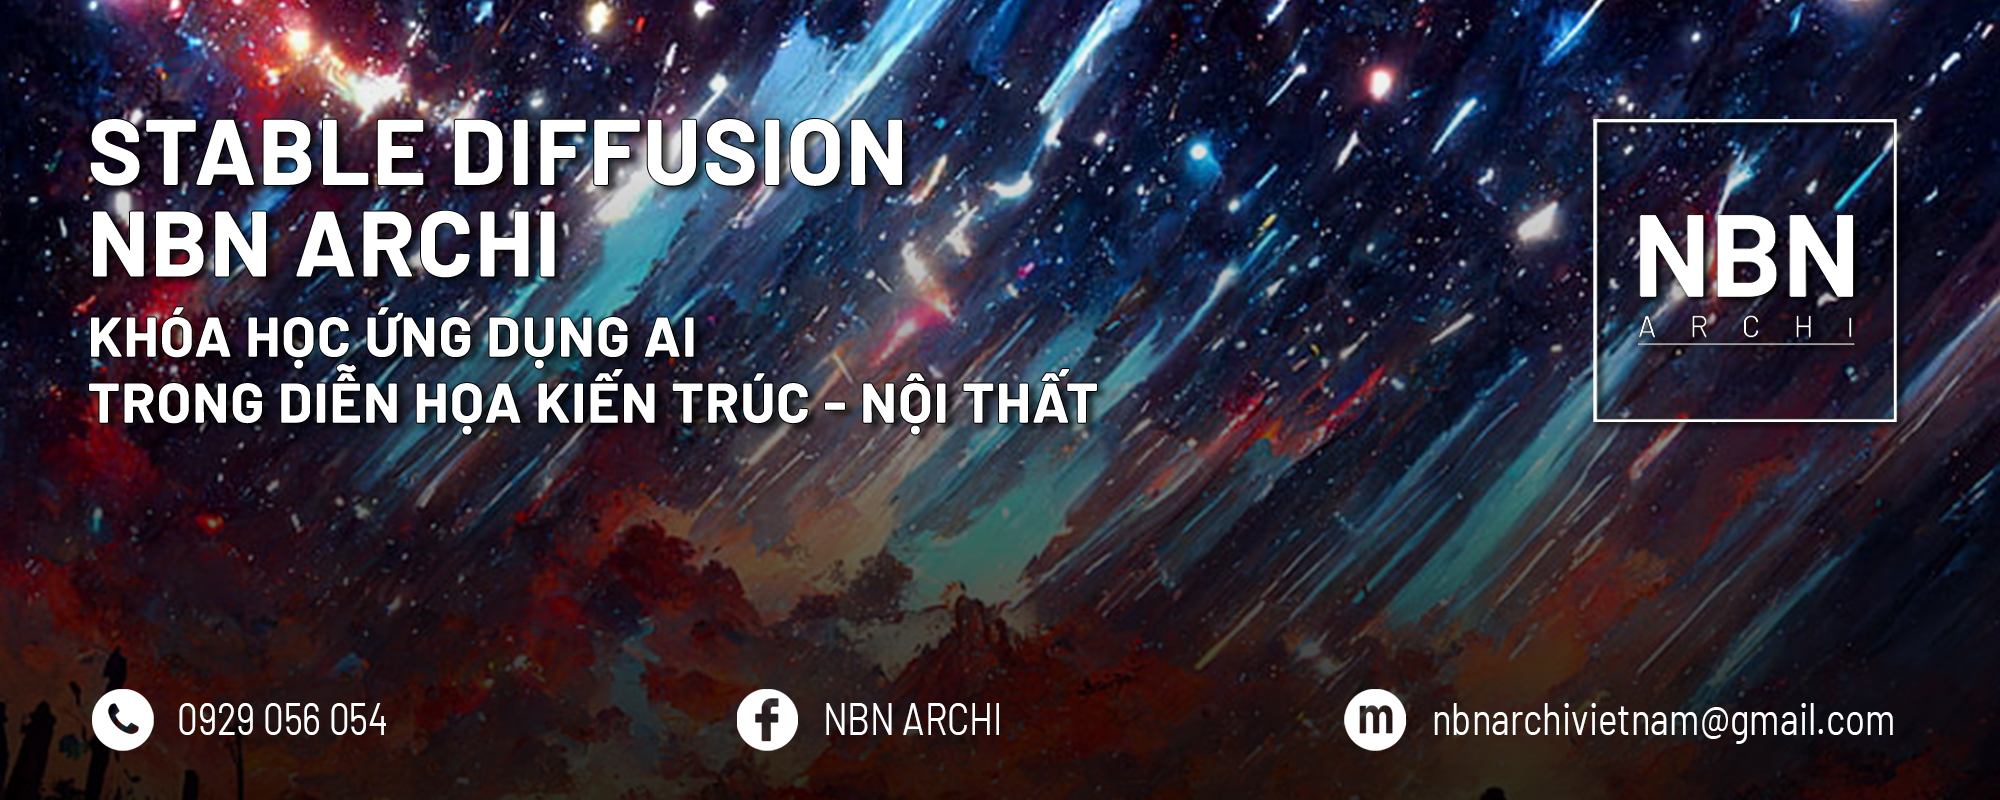

 ## **NBN ARCHI - STABLE DIFFUSION**

[![Badge with Link](https://raw.githubusercontent.com/nguyenbanghia/image/main/images/fb-rescale.jpg)](https://www.facebook.com/nguyenbanghia1702/)
---
---
[![Badge with Link](https://raw.githubusercontent.com/nguyenbanghia/image/main/images/tt-resacle.jpg)](https://www.tiktok.com/@nbnarchi)
---
---
[![Badge with Link](https://raw.githubusercontent.com/nguyenbanghia/image/main/images/yt-resacle.jpg)](https://www.youtube.com/channel/UCoJVIPH6o8mSdN0ktD0_wXQ)




In [ ]:
#@title #1. LỰA CHỌN MODEL
import os
from google.colab import drive
drive.mount('/content/drive')
%cd /content

# Cai dat tcmalloc
!apt -y update -qq
!apt-get install libgoogle-perftools4 libtcmalloc-minimal4 -y
!apt -y install -qq aria2
%env LD_PRELOAD=libtcmalloc_minimal.so.4.5.9

# Giao diện

mode = 'dark'
!aria2c --continue --console-log-level=error -c -x 16 -s 16 -k 1M https://raw.githubusercontent.com/minhnhat0709/sd-colab-config/main/repositories_link.txt -d /content -o links.txt
with open("/content/links.txt") as file:
  links = file.readlines()

url = links[0]
repo_name_start_index = url.rfind("/") + 1
repo_name = url[repo_name_start_index:].strip()

gitUrl = url
gitFolder = repo_name

!git clone $gitUrl
#Extension
%cd $gitFolder/extensions
for link in links:
  !git clone $link

control_net_folder_name = links[1][(links[1].rfind("/") + 1):].strip()
print(control_net_folder_name)

%cd ..

#Controlnet install Preprocessor

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/150_16_swin_l_oneformer_coco_100ep.pth -d /content/$gitFolder/models/oneformer -o 150_16_swin_l_oneformer_coco_100ep.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/250_16_swin_l_oneformer_ade20k_160k.pth -d /content/$gitFolder/models/oneformer -o 250_16_swin_l_oneformer_ade20k_160k.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/ZoeD_M12_N.pt -d /content/$gitFolder/models/zoedepth -o ZoeD_M12_N.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/dpt_beit_large_512.pt -d /content/$gitFolder/models/midas -o dpt_beit_large_512.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/dpt_hybrid-midas-501f0c75.pt -d /content/$gitFolder/models/midas -o dpt_hybrid-midas-501f0c75.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/dpt_large-midas-2f21e586.pt -d /content/$gitFolder/models/midas -o dpt_large-midas-2f21e586.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/facenet.pth -d /content/$gitFolder/models/openpose -o facenet.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/hand_pose_model.pth -d /content/$gitFolder/models/openpose -o hand_pose_model.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/body_pose_model.pth -d /content/$gitFolder/models/openpose -o body_pose_model.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth -d /content/$gitFolder/models/keypose -o faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth -d /content/$gitFolder/models/keypose -o hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/latest_net_G.pth -d /content/$gitFolder/models/leres -o latest_net_G.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/res101.pth -d /content/$gitFolder/models/leres -o res101.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/mlsd_large_512_fp32.pth -d /content/$gitFolder/models/mlsd -o mlsd_large_512_fp32.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/netG.pth -d /content/$gitFolder/models/lineart_anime -o netG.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/network-bsds500.pth -d /content/$gitFolder/models/hed -o network-bsds500.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/scannet.pt -d /content/$gitFolder/models/normal_bae -o scannet.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/sk_model.pth -d /content/$gitFolder/models/lineart -o sk_model.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/sk_model2.pth -d /content/$gitFolder/models/lineart -o sk_model2.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/table5_pidinet.pth -d /content/$gitFolder/models/pidinet -o table5_pidinet.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/upernet_global_small.pth -d /content/$gitFolder/models/uniformer -o upernet_global_small.pth

#ControlNet Model

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_canny_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_canny.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_depth_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11f1p_sd15_depth.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_lineart_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_lineart.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_mlsd_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_mlsd.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_openpose_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_openpose.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_scribble_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_scribble.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_seg_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_seg_fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15s2_lineart_anime_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15s2_lineart_anime.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11u_sd15_tile_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11u_sd15_tile.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_inpaint_fp16.safetensors -d /content/$gitFolder/extensions/$control_net_folder_name/models -o control_v11p_sd15_inpaint_fp16.safetensors

# VAE FILE

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/stabilityai/sd-vae-ft-mse-original/resolve/main/vae-ft-mse-840000-ema-pruned.ckpt -d /content/$gitFolder/models/Stable-diffusion -o VAE84.vae.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/stabilityai/sd-vae-ft-ema-original/resolve/main/vae-ft-ema-560000-ema-pruned.safetensors -d /content/$gitFolder/models/Stable-diffusion -o VAE56.vae.pt


#Custom

!mkdir /content/drive/MyDrive/StableDiffusion
!mkdir /content/drive/MyDrive/StableDiffusion/Model
!mkdir /content/drive/MyDrive/StableDiffusion/Setting
!mkdir /content/drive/MyDrive/StableDiffusion/Lora
!mkdir /content/drive/MyDrive/StableDiffusion/Embeddings
!mkdir /content/drive/MyDrive/StableDiffusion/wildcards
!mkdir /content/drive/MyDrive/StableDiffusion/Hypernetworks
!mkdir /content/drive/MyDrive/StableDiffusion/Outputs
!mkdir /content/$gitFolder/outputs

!ln -s /content/drive/MyDrive/StableDiffusion/wildcards /content/$gitFolder/extensions/sd-dynamic-prompts/

!aria2c --auto-file-renaming=false -c -x 16 -s 16 -k 1M https://raw.githubusercontent.com/minhnhat0709/sd-colab-config/main/config.json -d /content/drive/MyDrive/StableDiffusion/Setting -o config.json

model_urls = [
    {
        "name": "Chilloutmix",
        "download_url": "https://civitai.com/api/download/models/11745"
    },
    {
        "name": "DreamShaper4",
        "download_url": "https://civitai.com/api/download/models/24365"
    },
    {
        "name": "RealisticVision_V30",
        "download_url": "https://civitai.com/api/download/models/105674"
    },
    {
        "name": "RealisticVision_V40",
        "download_url": "https://civitai.com/api/download/models/114367"
    },
    {
        "name": "Deliberate",
        "download_url": "https://civitai.com/api/download/models/15236"
    },
    {
        "name": "dvArch",
        "download_url": "https://civitai.com/api/download/models/10081"
    },
    {
        "name": "XSarchitectural",
        "download_url": "https://civitai.com/api/download/models/38193"
    },
    {
        "name": "ReV-Animated",
        "download_url": "https://civitai.com/api/download/models/46846"
    },
    {
        "name": "StableDiffusion-v15",
        "download_url": "https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned.safetensors"
    }
]
def find_model_by_name(model_list, name):
    for model in model_list:
        if model["name"] == name:
            return model
    return None
#@markdown #Chọn Model
Model = "RealisticVision_V30" #@param ["None Model", "Chilloutmix", "DreamShaper4", "RealisticVision_V30", "RealisticVision_V40", "dvArch", "XSarchitectural", "Deliberate", "ReV-Animated", "StableDiffusion-v15"]
if Model != "None Model":
  model_url = find_model_by_name(model_urls, Model)["download_url"]
  ckpt = "/content/drive/MyDrive/StableDiffusion/Model/{}.safetensors".format(Model)
  model_download_command = "aria2c --console-log-level=error -c -x 16 -s 16 -k 1M {} -d /content/drive/MyDrive/StableDiffusion/Model -o {}.safetensors".format(model_url, Model)
  !{model_download_command}
else:
  ckpt = "/content/drive/MyDrive/StableDiffusion/Model/xyz.safetensors"

In [ ]:
#@title #2. KHỞI CHẠY STABLE DIFFUSION
!python launch.py --api --share --listen --theme dark --xformers --enable-insecure-extension-access --multiple  --ui-config-file /content/drive/MyDrive/StableDiffusion/Setting/ui-config.json --ui-settings-file /content/drive/MyDrive/StableDiffusion/Setting/config.json --ckpt $ckpt --ckpt-dir /content/drive/MyDrive/StableDiffusion/Model/ --lora-dir /content/drive/MyDrive/StableDiffusion/Lora/ --embeddings-dir /content/drive/MyDrive/StableDiffusion/Embeddings --styles-file /content/drive/MyDrive/StableDiffusion/Setting/styles.csv --hypernetwork-dir /content/drive/MyDrive/StableDiffusion/Hypernetworks